In [94]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pulp
import time 

In [95]:
cust_df = pd.read_csv("customers.csv")
prob_df = pd.read_csv("visit_probability.csv")
print(cust_df.shape)
cust_df.head(0)

(5000, 3)


,customer_id,age_cat,freq_cat


In [96]:
cust_df.dtypes

customer_id     int64
age_cat        object
freq_cat       object
dtype: object

<Axes: >

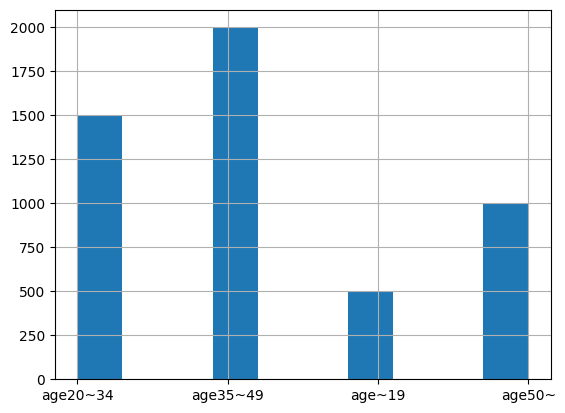

In [97]:
cust_df["age_cat"].hist()

<Axes: >

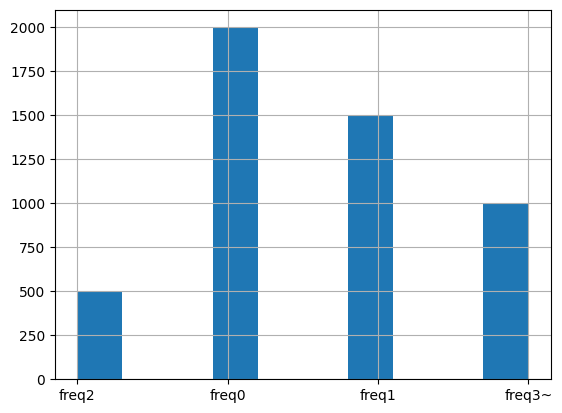

In [98]:
cust_df["freq_cat"].hist()

In [99]:
cust_pivot_df = pd.pivot_table(data = cust_df,values="customer_id",columns="freq_cat",index="age_cat",aggfunc="count")
cust_pivot_df = cust_pivot_df.reindex(["age~19","age20~34","age35~49","age50~"])
cust_pivot_df

freq_cat,freq0,freq1,freq2,freq3~
age_cat,,,,
age~19,200,150,50,100
age20~34,600,450,150,300
age35~49,800,600,200,400
age50~,400,300,100,200


150人

<Axes: xlabel='freq_cat', ylabel='age_cat'>

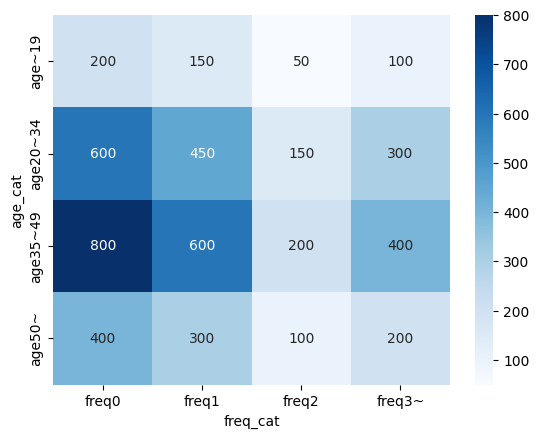

In [100]:
sns.heatmap(cust_pivot_df,annot=True,fmt="d",cmap="Blues")

In [101]:
print(prob_df.shape)
prob_df

(16, 6)


,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


<Axes: xlabel='freq_cat', ylabel='age_cat'>

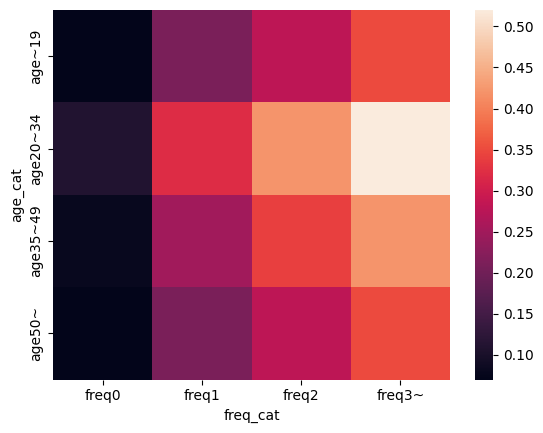

In [102]:
prob_pivot_df1 = pd.pivot_table(data = prob_df,values ="prob_dm1",columns="freq_cat",index="age_cat")
prob_pivot_df1 = prob_pivot_df1.reindex(["age~19","age20~34","age35~49","age50~"])
sns.heatmap(prob_pivot_df1)

<Axes: xlabel='freq_cat', ylabel='age_cat'>

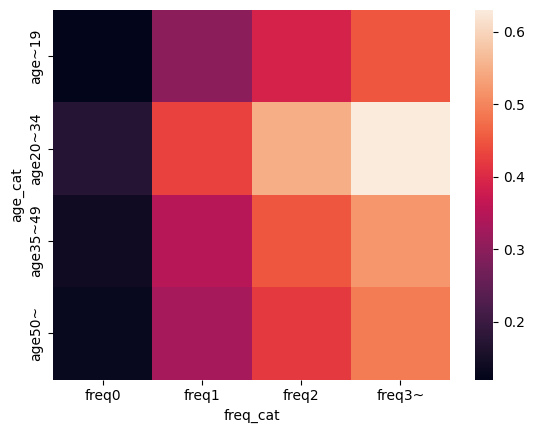

In [103]:
prob_pivot_df2 = pd.pivot_table(data = prob_df,values ="prob_dm2",columns="freq_cat",index="age_cat")
prob_pivot_df2 = prob_pivot_df2.reindex(["age~19","age20~34","age35~49","age50~"])
sns.heatmap(prob_pivot_df2)

<Axes: xlabel='freq_cat', ylabel='age_cat'>

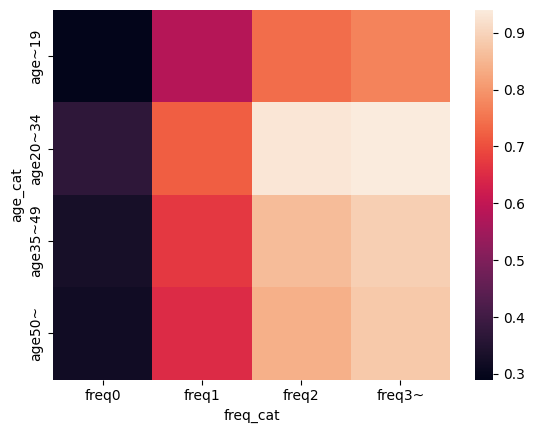

In [104]:
prob_pivot_df3 = pd.pivot_table(data = prob_df,values ="prob_dm3",columns="freq_cat",index="age_cat")
prob_pivot_df3 = prob_pivot_df3.reindex(["age~19","age20~34","age35~49","age50~"])
sns.heatmap(prob_pivot_df3)

In [105]:
prob = pulp.LpProblem("nu",pulp.LpMaximize)

I = cust_df["customer_id"]
M = [1,2,3]

xim ={}
for i in I:
    for m in M:
        xim[i,m] = pulp.LpVariable(name=f"xim({i},{m})",cat="Binary")
len(xim)

15000

In [106]:
for i in I:
    prob += pulp.lpSum([xim[i,m] for m in M]) == 1

In [107]:
cust_df

,customer_id,age_cat,freq_cat
0,1,age20~34,freq2
1,2,age35~49,freq0
2,3,age35~49,freq0
3,4,age~19,freq0
4,5,age35~49,freq0
...,...,...,...
4995,4996,age50~,freq0
4996,4997,age50~,freq0
4997,4998,age35~49,freq1
4998,4999,age50~,freq1


In [108]:
prob_df

,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,age~19,freq0,1,0.07,0.12,0.29
1,age~19,freq1,2,0.21,0.30,0.58
2,age~19,freq2,3,0.28,0.39,0.74
3,age~19,freq3~,4,0.35,0.45,0.77
4,age20~34,freq0,5,0.11,0.17,0.37
5,age20~34,freq1,6,0.32,0.43,0.72
6,age20~34,freq2,7,0.42,0.55,0.93
7,age20~34,freq3~,8,0.52,0.63,0.94
8,age35~49,freq0,9,0.08,0.14,0.33
9,age35~49,freq1,10,0.25,0.35,0.67


In [109]:
keys = ["age_cat","freq_cat"]
cust_prob_df = pd.merge(cust_df,prob_df,on=keys)
cust_prob_df

,customer_id,age_cat,freq_cat,segment_id,prob_dm1,prob_dm2,prob_dm3
0,1,age20~34,freq2,7,0.42,0.55,0.93
1,199,age20~34,freq2,7,0.42,0.55,0.93
2,200,age20~34,freq2,7,0.42,0.55,0.93
3,255,age20~34,freq2,7,0.42,0.55,0.93
4,269,age20~34,freq2,7,0.42,0.55,0.93
...,...,...,...,...,...,...,...
4995,4474,age~19,freq2,3,0.28,0.39,0.74
4996,4596,age~19,freq2,3,0.28,0.39,0.74
4997,4720,age~19,freq2,3,0.28,0.39,0.74
4998,4910,age~19,freq2,3,0.28,0.39,0.74


In [110]:
cust_prob_ver_df = cust_prob_df.rename(columns={"prob_dm1": 1,"prob_dm2": 2,"prob_dm3": 3}).melt(id_vars=["customer_id"],value_vars=[1,2,3],var_name="dm",value_name="prob")
cust_prob_ver_df

,customer_id,dm,prob
0,1,1,0.42
1,199,1,0.42
2,200,1,0.42
3,255,1,0.42
4,269,1,0.42
...,...,...,...
14995,4474,3,0.74
14996,4596,3,0.74
14997,4720,3,0.74
14998,4910,3,0.74


In [111]:
Pim = cust_prob_ver_df.set_index(["customer_id","dm"])["prob"].to_dict()

In [112]:
Pim[23,2]

0.35

In [113]:
prob += pulp.lpSum((Pim[i,m] - Pim[i,1])*xim[i,m] for i in I for m in [2,3])

In [114]:
Cm = {1:0,2:1000,3:2000}

In [115]:
prob += pulp.lpSum(Cm[m]*Pim[i,m]*xim[i,m] for i in I for m in [2,3]) <= 1000000

In [116]:
S = prob_df["segment_id"].to_list()
Ns = cust_prob_df.groupby("segment_id")["customer_id"].count().to_dict()
Ns

{1: 200,
 2: 150,
 3: 50,
 4: 100,
 5: 600,
 6: 450,
 7: 150,
 8: 300,
 9: 800,
 10: 600,
 11: 200,
 12: 400,
 13: 400,
 14: 300,
 15: 100,
 16: 200}

In [117]:
Si = cust_prob_df.set_index("customer_id")["segment_id"].to_dict()


In [118]:
for s in S:
    for m in M:
        prob += pulp.lpSum(xim[i,m] for i in I if Si[i] == s) >= 0.1*Ns[s]

In [119]:
time_start = time.time()
status = prob.solve()
time_stop = time.time()
print(f'ステータス:{pulp.LpStatus[status]}')
print(f'目的関数値:{pulp.value(prob.objective):.4}')
print(f'計算時間:{(time_stop - time_start):.3}(秒)')

In [ ]:
send_dm_df = pd.DataFrame([[xim[i,m].value() for m in M] for i in I],columns=["send_dm1","send_dm2","send_dm3"])
send_dm_df

,send_dm1,send_dm2,send_dm3
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
4995,0.0,1.0,0.0
4996,0.0,0.0,1.0
4997,1.0,0.0,0.0
4998,1.0,0.0,0.0


In [ ]:
cust_send_df = pd.concat([prob_df[["segment_id","age_cat","freq_cat"]],send_dm_df],axis = 1)
cust_send_df.head()

,segment_id,age_cat,freq_cat,send_dm1,send_dm2,send_dm3
0,1.0,age~19,freq0,0.0,1.0,0.0
1,2.0,age~19,freq1,0.0,1.0,0.0
2,3.0,age~19,freq2,0.0,1.0,0.0
3,4.0,age~19,freq3~,0.0,0.0,1.0
4,5.0,age20~34,freq0,0.0,1.0,0.0


<Axes: xlabel='freq_cat', ylabel='age_cat'>

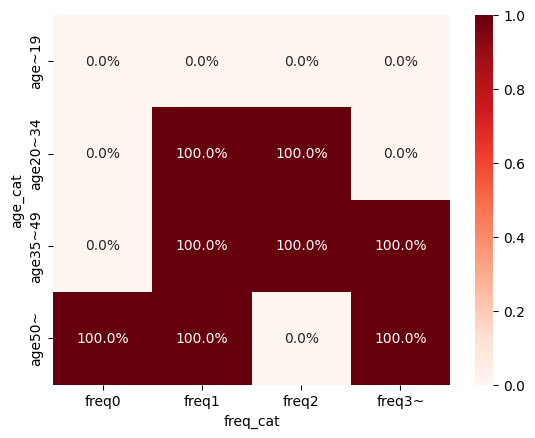

In [ ]:
prob_pivot_df = pd.pivot_table(data = cust_send_df, values = 'send_dm1', columns = 'freq_cat', index = 'age_cat')
prob_pivot_df = prob_pivot_df.reindex(['age~19', 'age20~34','age35~49','age50~'])
sns.heatmap(prob_pivot_df,annot = True,fmt = ".1%" ,cmap="Reds")

<Axes: xlabel='freq_cat', ylabel='age_cat'>

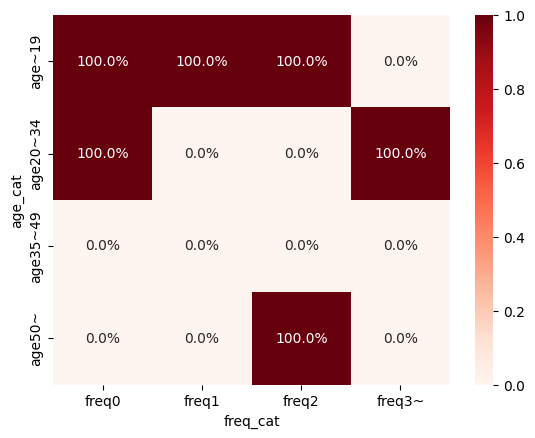

In [ ]:
prob_pivot_df2 = pd.pivot_table(data = cust_send_df, values = 'send_dm2', columns = 'freq_cat', index = 'age_cat')
prob_pivot_df2 = prob_pivot_df2.reindex(['age~19', 'age20~34','age35~49','age50~'])
sns.heatmap(prob_pivot_df2,annot = True,fmt = ".1%" ,cmap="Reds")

<Axes: xlabel='freq_cat', ylabel='age_cat'>

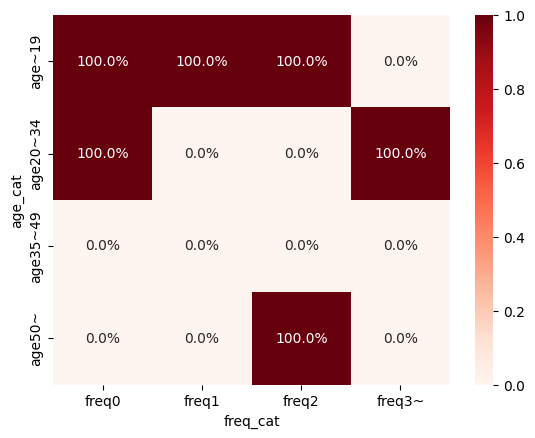

In [ ]:
prob_pivot_df3 = pd.pivot_table(data = cust_send_df, values = 'send_dm3', columns = 'freq_cat', index = 'age_cat')
prob_pivot_df3 = prob_pivot_df3.reindex(['age~19', 'age20~34','age35~49','age50~'])
sns.heatmap(prob_pivot_df2,annot = True,fmt = ".1%" ,cmap="Reds")

In [ ]:
pro2 = pulp.LpProblem("DiscountCouponProblem2",pulp.LpMaximize)

xsm = {}

for s in S:
    for m in M:
        xsm[s,m] = pulp.LpVariable(name=f"xsm({s},{m})",lowBound=0,upBound=1,cat="Continuous")
for s in S:        
    pro2 += pulp.lpSum([xsm[s,m] for m in M]) == 1

prob_ver_df = prob_df.rename(columns={'prob_dm1': 1,'prob_dm2': 2, 'prob_dm3': 3}).melt(id_vars=['segment_id'], value_vars=[1,2,3], var_name='dm', value_name='prob')
Psm = prob_ver_df.set_index(['segment_id','dm'])['prob'].to_dict()
print(Psm)

{(1, 1): 0.07, (2, 1): 0.21, (3, 1): 0.28, (4, 1): 0.35, (5, 1): 0.11, (6, 1): 0.32, (7, 1): 0.42, (8, 1): 0.52, (9, 1): 0.08, (10, 1): 0.25, (11, 1): 0.34, (12, 1): 0.42, (13, 1): 0.07, (14, 1): 0.21, (15, 1): 0.28, (16, 1): 0.35, (1, 2): 0.12, (2, 2): 0.3, (3, 2): 0.39, (4, 2): 0.45, (5, 2): 0.17, (6, 2): 0.43, (7, 2): 0.55, (8, 2): 0.63, (9, 2): 0.14, (10, 2): 0.35, (11, 2): 0.45, (12, 2): 0.52, (13, 2): 0.13, (14, 2): 0.33, (15, 2): 0.42, (16, 2): 0.49, (1, 3): 0.29, (2, 3): 0.58, (3, 3): 0.74, (4, 3): 0.77, (5, 3): 0.37, (6, 3): 0.72, (7, 3): 0.93, (8, 3): 0.94, (9, 3): 0.33, (10, 3): 0.67, (11, 3): 0.86, (12, 3): 0.89, (13, 3): 0.32, (14, 3): 0.65, (15, 3): 0.84, (16, 3): 0.88}


In [ ]:
pro2 += pulp.lpSum(Ns[s]*(Psm[s,m] - Psm[s,1])*xsm[s,m] for s in S for m in M)
pro2 += pulp.lpSum(Cm[m]*Ns[s]*Psm[s,m]*xsm[s,m] for s in S for m in M) <= 1000000
for m in M:
    for s in S:
        pro2 += pulp.lpSum(xsm[s,m]) >= 0.1

In [ ]:
time_start = time.time()
status = pro2.solve()
time_stop = time.time()
print(f'ステータス:{pulp.LpStatus[status]}')
print(f'目的関数値:{pulp.value(pro2.objective):.4}')
print(f'計算時間:{(time_stop - time_start):.3}(秒)')

ステータス:Optimal
目的関数値:326.1
計算時間:0.0327(秒)


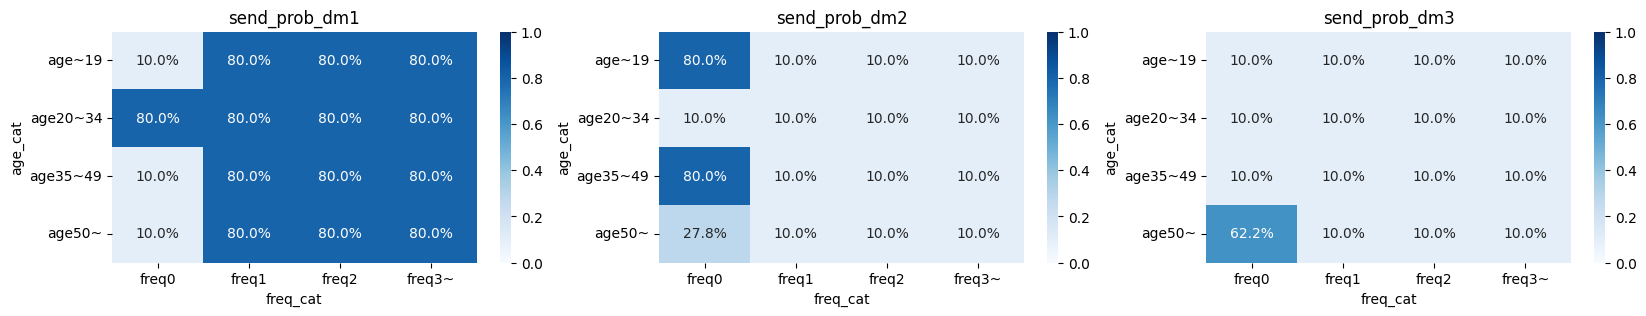

In [ ]:
send_dm_df = pd.DataFrame([[xsm[s,m].value() for m in M] for s in S], columns=['send_prob_dm1', 'send_prob_dm2','send_prob_dm3'])
seg_send_df = pd.concat([prob_df[['segment_id', 'age_cat', 'freq_cat']], send_dm_df], axis=1)
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1,3, figsize=(20,3))
for i, ptn in enumerate(['send_prob_dm1', 'send_prob_dm2', 'send_prob_dm3']):
    seg_send_pivot_df = pd.pivot_table(data=seg_send_df,values=ptn, columns='freq_cat', index='age_cat', aggfunc='mean')
    seg_send_pivot_df = seg_send_pivot_df.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(seg_send_pivot_df, annot=True, fmt='.1%', cmap='Blues', vmin=0, vmax=1, ax=ax[i])
    ax[i].set_title(f'{ptn}')
plt.show()

In [ ]:
seg_send_df['num_cust'] = seg_send_df['segment_id'].apply(lambda x: Ns[x])
seg_send_df['send_num_dm1'] = seg_send_df['send_prob_dm1']*seg_send_df['num_cust']
seg_send_df['send_num_dm2'] = seg_send_df['send_prob_dm2']*seg_send_df['num_cust']
seg_send_df['send_num_dm3'] = seg_send_df['send_prob_dm3']*seg_send_df['num_cust']
seg_send_df[['segment_id','send_num_dm1','send_num_dm2','send_num_dm3']].head()

,segment_id,send_num_dm1,send_num_dm2,send_num_dm3
0,1,20.0,160.0,20.0
1,2,120.0,15.0,15.0
2,3,40.0,5.0,5.0
3,4,80.0,10.0,10.0
4,5,480.0,60.0,60.0


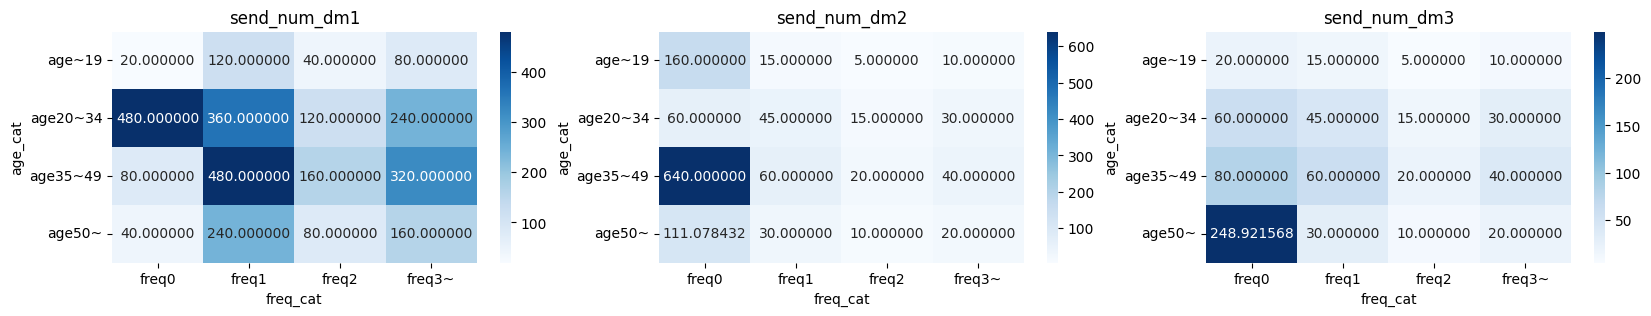

In [ ]:
ax = {}
fig,(ax[0],ax[1],ax[2]) = plt.subplots(1,3,figsize=(20,3))
for i ,ptn in enumerate(["send_num_dm1","send_num_dm2","send_num_dm3"]):
    seg_send_pivot_df = pd.pivot_table(data = seg_send_df,values=ptn,columns="freq_cat",index="age_cat")
    seg_send_pivot_df = seg_send_pivot_df.reindex(["age~19","age20~34","age35~49","age50~"])
    sns.heatmap(seg_send_pivot_df,annot=True,fmt="1f",cmap="Blues",ax=ax[i])
    ax[i].set_title(f"{ptn}")
plt.show()

In [ ]:
pro3 = pulp.LpProblem("DiscountCouponProblem3",pulp.LpMaximize)

xsm = {}
for s in S:
    for m in M:
        xsm[s,m] = pulp.LpVariable(name=f"xsm({s},{m})",lowBound=0,upBound=1,cat="Continuous")
        
y = pulp.LpVariable(name="y",lowBound=0,upBound=1,cat="Continuous")

pro3 += y

for s in S:
    for m in M:
        pro3 += xsm[s,m] >= y
        
for s in S:
    pro3 += pulp.lpSum(xsm[s,m] for m in M) == 1
pro3 += pulp.lpSum(Cm[m]*Ns[s]*Psm[s,m]*xsm[s,m] for s in S for m in M) <= 1000000

time_start = time.time()
status = pro3.solve()
time_stop = time.time()
print(f'ステータス:{pulp.LpStatus[status]}')
print(f'目的関数値:{pulp.value(pro3.objective):.4}')
print(f'計算時間:{(time_stop - time_start):.3}(秒)')

ステータス:Optimal
目的関数値:0.1313
計算時間:0.0458(秒)


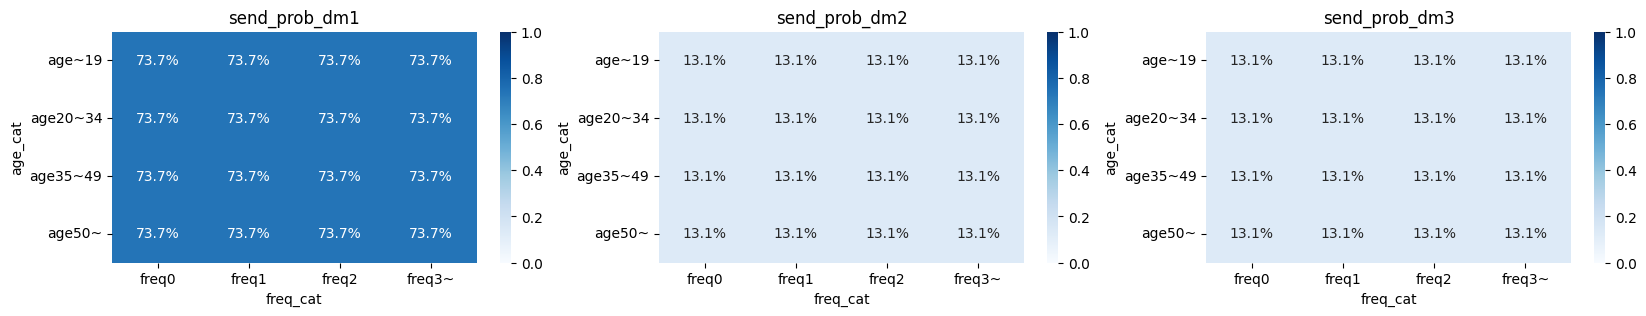

In [ ]:
send_dm_df = pd.DataFrame([[xsm[s,m].value() for m in M] for s in S], columns=['send_prob_dm1', 'send_prob_dm2','send_prob_dm3'])
seg_send_df = pd.concat([prob_df[['segment_id', 'age_cat', 'freq_cat']], send_dm_df], axis=1)
ax = {}
fig, (ax[0], ax[1], ax[2]) = plt.subplots(1,3, figsize=(20,3))
for i, ptn in enumerate(['send_prob_dm1', 'send_prob_dm2', 'send_prob_dm3']):
    seg_send_pivot_df = pd.pivot_table(data=seg_send_df,values=ptn, columns='freq_cat', index='age_cat', aggfunc='mean')
    seg_send_pivot_df = seg_send_pivot_df.reindex(['age~19', 'age20~34', 'age35~49', 'age50~'])
    sns.heatmap(seg_send_pivot_df, annot=True, fmt='.1%', cmap='Blues', vmin=0, vmax=1, ax=ax[i])
    ax[i].set_title(f'{ptn}')
plt.show()

In [ ]:
pro4 = pulp.LpProblem("DiscountCouponProblem4",pulp.LpMaximize)

xsm = {}
for s in S:
    for m in M:
        xsm[s,m] = pulp.LpVariable(name=f"xsm({s},{m})",lowBound=0,upBound=1,cat="Continuous")
        
y = pulp.LpVariable(name="y",lowBound=0,upBound=1,cat="Continuous")

pro4 += y

for s in S:
    for m in M:
        pro4 += xsm[s,m] >= 0.131
        
for s in S:
    pro4 += pulp.lpSum(xsm[s,m] for m in M) == 1
pro4 += pulp.lpSum(Cm[m]*Ns[s]*Psm[s,m]*xsm[s,m] for s in S for m in M) <= 1000000

time_start = time.time()
status = pro4.solve()
time_stop = time.time()
print(f'ステータス:{pulp.LpStatus[status]}')
print(f'目的関数値:{pulp.value(pro4.objective):.4}')
print(f'計算時間:{(time_stop - time_start):.3}(秒)')

ステータス:Optimal
目的関数値:1.0
計算時間:0.0321(秒)


In [ ]:
cost_list = []
cpa_list = []
inc_action_list = []

print('ステータス, キャンペーン費用, 来客増加数, CPA')

for cost in range(761850, 3000000, 100000):
    problem = pulp.LpProblem(name='DiscountCouponProblem2', sense=pulp.LpMaximize)
    xsm = {}
    for s in S:
        for m in M:
            xsm[s,m] = pulp.LpVariable(name=f'xsm({s},{m})', lowBound=0, upBound=1, cat='Continuous')
    for s in S:
        problem += pulp.lpSum(xsm[s,m] for m in M) == 1
    problem += pulp.lpSum(Ns[s] * (Psm[s,m] - Psm[s,1]) * xsm[s,m] for s in S for m in [2,3])
    problem += pulp.lpSum(Cm[m] * Ns[s] * Psm[s,m] * xsm[s,m] for s in S for m in [2,3]) <= cost
    for s in S:
        for m in M:
            problem += xsm[s,m] >= 0.1
    status = problem.solve()
    cpa = cost/pulp.value(problem.objective)
    inc_action = pulp.value(problem.objective)
    cost_list.append(cost)
    cpa_list.append(cpa)
    inc_action_list.append(inc_action)
    print(f'{pulp.LpStatus[status]}, {cost}, {inc_action :.4}, {cpa :.5}')

ステータス, キャンペーン費用, 来客増加数, CPA
Optimal, 761850, 229.0, 3326.9
Optimal, 861850, 273.1, 3156.3
Optimal, 961850, 311.9, 3084.0
Optimal, 1061850, 349.1, 3042.0
Optimal, 1161850, 385.8, 3011.8
Optimal, 1261850, 422.3, 2988.0
Optimal, 1361850, 458.8, 2968.0
Optimal, 1461850, 495.2, 2951.8
Optimal, 1561850, 530.5, 2944.2
Optimal, 1661850, 565.6, 2938.4
Optimal, 1761850, 600.7, 2933.2
Optimal, 1861850, 634.2, 2935.9
Optimal, 1961850, 667.3, 2940.2
Optimal, 2061850, 700.2, 2944.5
Optimal, 2161850, 732.5, 2951.4
Optimal, 2261850, 764.1, 2960.1
Optimal, 2361850, 795.5, 2969.2
Optimal, 2461850, 826.8, 2977.5
Optimal, 2561850, 858.1, 2985.3
Optimal, 2661850, 889.5, 2992.6
Optimal, 2761850, 920.8, 2999.3
Optimal, 2861850, 951.7, 3007.1
Optimal, 2961850, 981.9, 3016.4


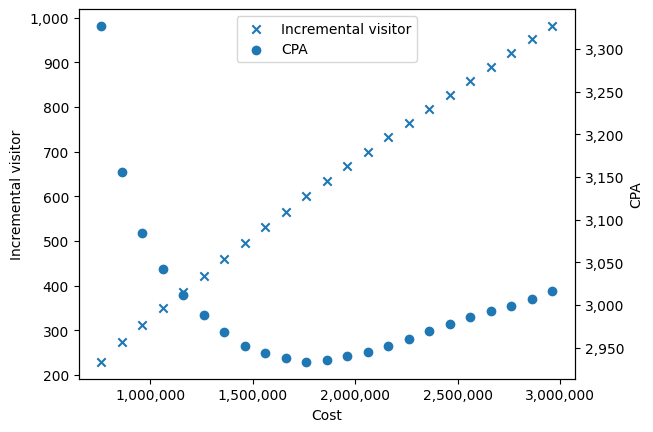

In [ ]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(cost_list, inc_action_list, marker='x', label='Incremental visitor')
ax2.scatter(cost_list, cpa_list, label='CPA')
ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x :,.0f}'))
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x :,.0f}'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x :,.0f}'))
ax1.set_xlabel('Cost')
ax1.set_ylabel('Incremental visitor')
ax2.set_ylabel('CPA')
reg1, label1 = ax1.get_legend_handles_labels()
reg2, label2 = ax2.get_legend_handles_labels()
ax2.legend(reg1 + reg2, label1 + label2, loc='upper center')
plt.show()